In [182]:
# Biblioteczki
from ipywidgets import Button, Layout, VBox, HBox # GUI
from IPython.display import display # GUI
import functools # Wysyłanie argumentu do funkcji button.on_click
import numpy as np # Operacje matematyczne
import random as rnd # Losowość
import matplotlib.pyplot as plot # Wyświetlanie tablic (debugowanie)

In [183]:
# Stałe w programie
W = 5
H = 7
LEARNING_RATE = 0.05
NOISE_RATE = 0.1
EPOCHS = 10000
NO_OF_COPIES = 9

In [184]:
# Fukcja dodająca losowy szum do wejścia
def noise(vector):
  result = vector.copy()
  for i in range(len(result)):
    if rnd.random() < NOISE_RATE:
      result[i] = 1 - result[i]
  return result

In [185]:
# Reprezentacje cyfr
digits = []
digits.append([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 0
digits.append([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]) # 1
digits.append([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 2
digits.append([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 3
digits.append([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]) # 4
digits.append([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 5
digits.append([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 6
digits.append([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]) # 7
digits.append([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 8
digits.append([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 9

In [186]:
# Dane uczące
data = []
for i in range(10):
  data.append((digits[i], i))
  for _ in range(NO_OF_COPIES):
    data.append((noise(digits[i]), i))

In [187]:
# Perceptron
class Perceptron():
  def __init__(self, size=W*H, learning_rate=LEARNING_RATE, epochs=EPOCHS):
    self.size = size
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = [rnd.random()-0.5 for _ in range(size+1)]
    self.timer = 0
    self.points = 0
    self.best_weights = self.weights
    self.best_timer = 0
  
  def train(self, training_data):
    for _ in range(self.epochs):
      input, label = rnd.choice(training_data)
      prediction = self.predict(input)
      if prediction == label:
        self.timer = self.timer + 1
        if self.timer > self.best_timer:
          self.best_weights = self.weights.copy()
          self.best_timer = self.timer
      else:
        self.weights += self.learning_rate * (label-prediction) * np.array([1]+input)
        self.timer = 0
    self.weights = self.best_weights

  def predict(self, input):
    sumation = np.dot([1]+input, self.weights)
    return int(sumation >= 0)
  
  def test(self, training_data):
    counter = 0
    for input, label in training_data:
      prediction = self.predict(input)
      counter += int(prediction == label)
    return counter


In [188]:
# Lista 10 perceptronów
perceptrons = [Perceptron() for _ in range(10)]

In [189]:
# Funkcje uruchamiane przez naciśnięcie buttonów

# Zaaktualizowanie panelu (5x7) 
def update():
  for i in range(len(buttons)):
    if table[i] == 0:
      buttons[i].style.button_color = 'white'
    else:
      buttons[i].style.button_color = 'black'

# Zmiana odpowiedniego pixela
def on_button_clicked(button, id):
    table[id] = 1-table[id]
    update()

# Wyświetlenie odpowiedniej cyfry na panelu
def display_digit(button):
  table[:] = digits[int(button.description)].copy()
  update()

# Wyczyszczenie panelu
def clear(button):
  table[:] = np.zeros(35)
  update()

# Dodanie losowego szumu
def make_noise(button):
  table[:] = noise(table)
  update()

# Trenowanie perceptronów
def train(button):
  counter = 0
  for i in range(len(perceptrons)):
    training_data = []
    for input, label in data:
      training_data.append((input, int(label == i)))
    perceptrons[i].train(training_data)
    counter += perceptrons[i].test(training_data)
  print("Poprawnie nauczone przypadki testowe:", counter, "/", 100*(NO_OF_COPIES+1))

# Predykcja
def predict(button):
  print("Możliwe cyfry:", end="")
  for i, perceptron in enumerate(perceptrons):
    if perceptron.predict(table) == 1:
      print(i, end=" ")
  print()


In [190]:
# Interfejs graficzny

# Tworzenie buttonów
buttons = [Button(layout=Layout(width="25px", height="25px")) for i in range(35)]
digit_buttons = [Button(description=str(i), layout=Layout(width="25px", height="25px")) for i in range(10)]
train_button = Button(description="Trenuj", layout=Layout(width="141px", height="25px"))
predict_button = Button(description="Sprawdź", layout=Layout(width="141px", height="25px"))
clear_button = Button(description="Wyczyść", layout=Layout(width="141px", height="25px"))
noise_button = Button(description="Dodaj szum", layout=Layout(width="141px", height="25px"))
table = [0]*W*H

# Wyświetlanie buttonów
box = VBox([HBox([buttons[W*i+j] for j in range(W)]) for i in range(H)])
display(box)
box = VBox([HBox([digit_buttons[5*i+j] for j in range(5)]) for i in range(2)])
display(box)
display(train_button)
display(predict_button)
display(clear_button)
display(noise_button)
update()

# Dodanie funkcji do uchwytu on_click
for i in range(35):
  buttons[i].on_click(functools.partial(on_button_clicked, id=i))
for i in range(10):
  digit_buttons[i].on_click(display_digit)
train_button.on_click(train)
predict_button.on_click(predict)
clear_button.on_click(clear)
noise_button.on_click(make_noise)

Button(description='Trenuj', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Sprawdź', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Wyczyść', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Button(description='Dodaj szum', layout=Layout(height='25px', width='141px'), style=ButtonStyle())

Poprawnie nauczone przypadki testowe: 1000 / 1000
Możliwe cyfry:0 
Możliwe cyfry:0 
Możliwe cyfry:1 
Możliwe cyfry:1 
Możliwe cyfry:
Możliwe cyfry:
Możliwe cyfry:2 
Możliwe cyfry:2 
Możliwe cyfry:2 
Możliwe cyfry:2 
Możliwe cyfry:2 
Możliwe cyfry:3 9 
Możliwe cyfry:4 
Możliwe cyfry:6 
Możliwe cyfry:9 
Możliwe cyfry:7 
Możliwe cyfry:7 
Możliwe cyfry:
Możliwe cyfry:8 
Możliwe cyfry:5 9 


[[-0.30316049  0.03756278 -0.13604313  0.00717062 -0.1421502 ]
 [ 0.74183409 -0.58030993 -0.14483437 -0.39492599  0.21469595]
 [ 0.04374332 -0.30923677 -0.52257211 -0.0330235   0.51928497]
 [ 0.07410908 -0.61639254 -0.53973535 -0.55522685 -0.03655632]
 [ 0.50984434 -0.40699991 -0.03774391 -0.3240143   0.05980177]
 [ 0.35496821 -0.12578234 -0.3401474  -0.44583403 -0.20997727]
 [ 0.2128704   0.24521162 -0.448908    0.0633148  -0.22666462]]


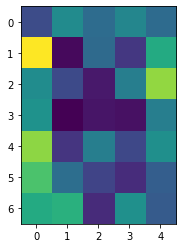

In [193]:
# Wyswietlanie wag (debugowanie)
x = 0
plot.imshow(np.reshape(perceptrons[x].weights[1:], (7, 5)))
print(np.reshape(perceptrons[x].weights[1:], (7, 5)))